In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

print(mpl.__version__)

3.8.1


# Figures and axes

References

- https://matplotlib.org/3.1.0/tutorials/intermediate/tight_layout_guide.html#sphx-glr-tutorials-intermediate-tight-layout-guide-py

- https://matplotlib.org/3.1.0/tutorials/intermediate/gridspec.html#sphx-glr-tutorials-intermediate-gridspec-py

- https://matplotlib.org/3.1.0/tutorials/intermediate/constrainedlayout_guide.html#sphx-glr-tutorials-intermediate-constrainedlayout-guide-py

## Creating figures and axes

### Single axes


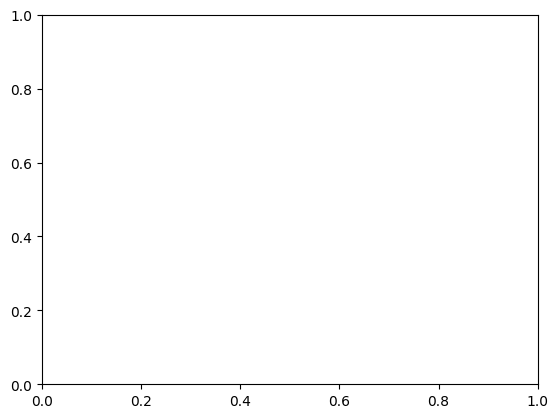

In [2]:
fig, ax = plt.subplots()
plt.show()

### Multiple axes

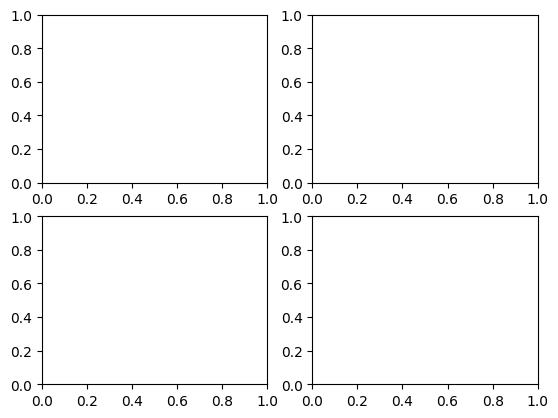

In [3]:
fig, axs = plt.subplots(nrows=2, ncols=2)
plt.show()

#### Tight layout

In the example above the axis labels overlap and in general the supplied space is not optimal. In the most cases, calling `fig.tight_layout` will solve these problems sufficiently.

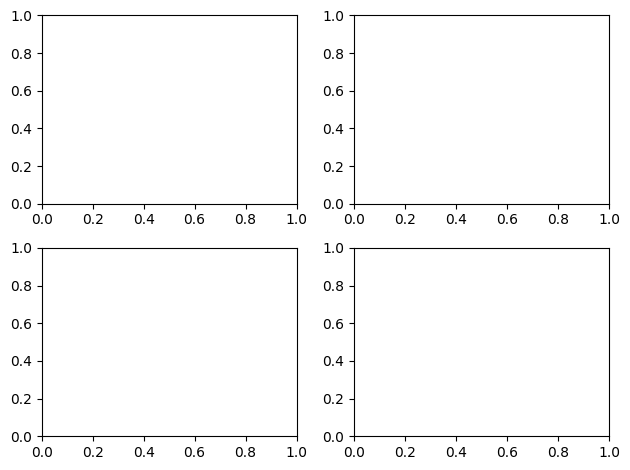

In [4]:
fig, axs = plt.subplots(nrows=2, ncols=2)
fig.tight_layout()
plt.show()

#### Sharing axis between subplots

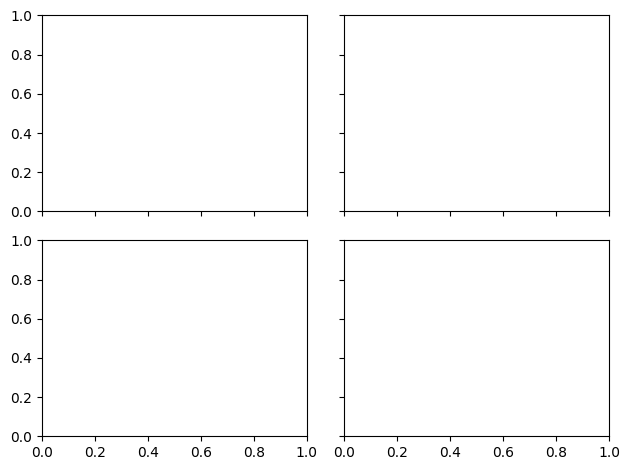

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True)
fig.tight_layout()
plt.show()

#### A note on the axes return

Be aware of the second return in the examples above. `ax` or `axs` can be either an `AxesSubplot` object or a numpy array of such objects (technical side note: they are created as a 2-dimensional numpy array and then squeezed, which removes every empty axis and thus only returns the value for an array with shape `(1,1)`).

```python
plt.subplots(nrows=1, ncols=1)  # no shape, this is an AxesSubplot object
plt.subplots(nrows=1, ncols=2)  # shape (2,)
plt.subplots(nrows=2, ncols=1)  # shape (2,)
plt.subplots(nrows=2, ncols=2)  # shape (2,2)
```





To some people (like me) it might be confusing, that `(nrows=2, ncols=1)` and `(nrows=1, ncols=2)` both produce an array with shape `(2,)`, as you might expect an `(1, 2)` array for the latter one. Luckily, the function has a keyword argument for the squeezing behavior, such that you can always get a two-dimensional array.

```python
fig, axs = plt.subplots(nrows=1, ncols=1, squeeze=False)  # shape (1, 1)
fig, axs = plt.subplots(nrows=2, ncols=1, squeeze=False)  # shape (2, 1)
fig, axs = plt.subplots(nrows=1, ncols=2, squeeze=False)  # shape (1, 2)
```




### More complicated layouts with gridspec

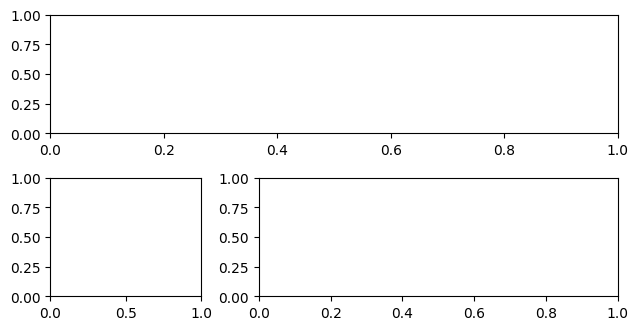

In [6]:
# Custom plot arrangements
fig = plt.figure()
gs = GridSpec(3, 3, figure=fig)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, :1])
ax3 = fig.add_subplot(gs[1, 1:])
fig.tight_layout()
plt.show()

### Constrained layout

Removes need for tight_layout

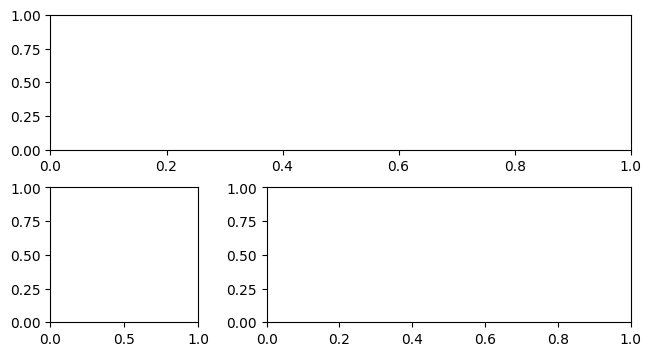

In [7]:
fig = plt.figure(constrained_layout=True)
gs = GridSpec(3, 3, figure=fig)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, :1])
ax3 = fig.add_subplot(gs[1, 1:])
plt.show()

## Subplot projections

In [8]:
from mpl_toolkits import mplot3d

### Polar

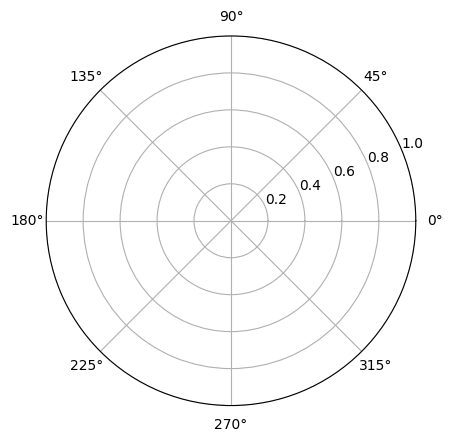

In [9]:
fig, ax = plt.subplots(subplot_kw={"projection": "polar"})

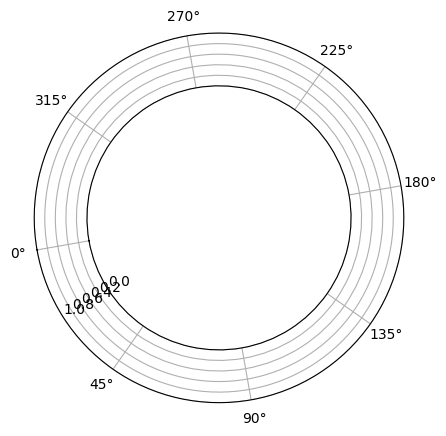

In [10]:
fig, ax = plt.subplots(subplot_kw={"projection": "polar"})
ax.set_rorigin(-2.5)
ax.set_theta_zero_location("W", offset=10)

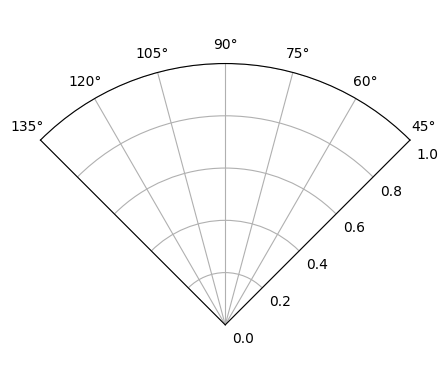

In [11]:
fig, ax = plt.subplots(subplot_kw={"projection": "polar"})
ax.set_thetamin(45)
ax.set_thetamax(135)
plt.show()

### Three dimensional

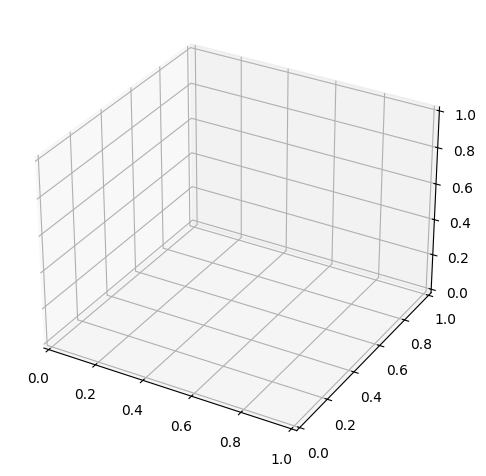

In [12]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
fig.tight_layout()
plt.show()

#### Background

In [13]:
# fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# ax.w_xaxis.pane.set_color("w")
# ax.w_yaxis.pane.set_color("w")
# ax.w_zaxis.pane.set_color("w")
# fig.tight_layout()
# plt.show()

#### Rotation

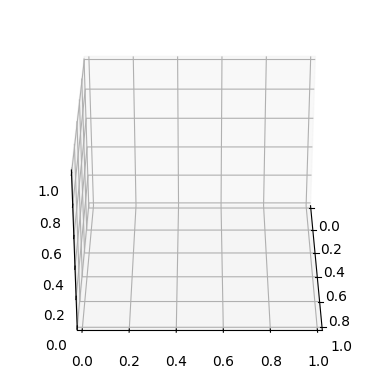

In [14]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.view_init(30, 0)  # Default: 30, -60
plt.show()

### Geographic

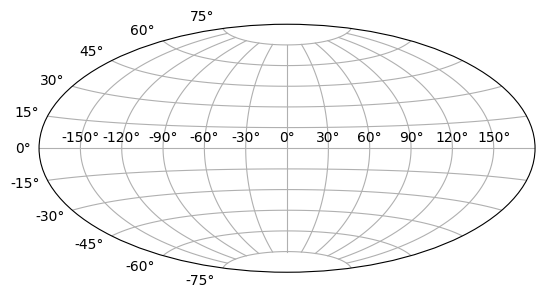

In [15]:
fig, ax = plt.subplots(subplot_kw={"projection": "aitoff"})
ax.grid()
plt.show()

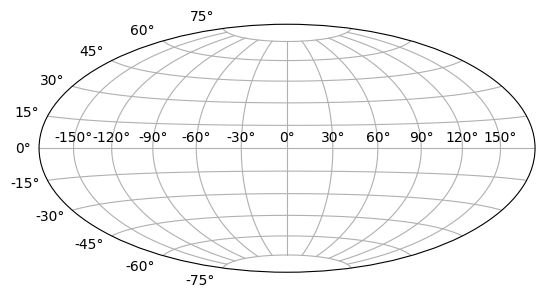

In [16]:
fig, ax = plt.subplots(subplot_kw={"projection": "hammer"})
ax.grid()
plt.show()

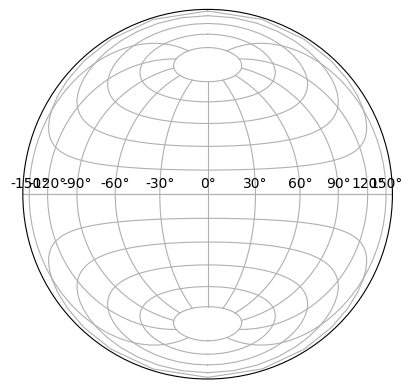

In [17]:
fig, ax = plt.subplots(subplot_kw={"projection": "lambert"})
ax.grid()
plt.show()

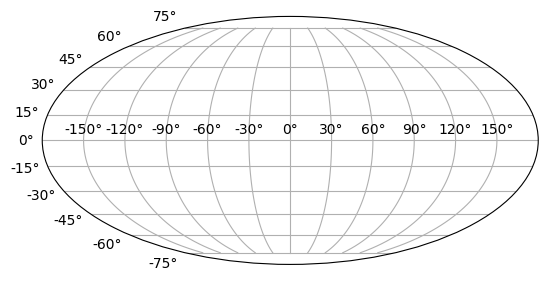

In [18]:
fig, ax = plt.subplots(subplot_kw={"projection": "mollweide"})
ax.grid()
plt.show()

### Custom

See the official [documentation](https://matplotlib.org/3.2.0/gallery/misc/custom_projection.html)

### Multiple different projections

To my knowledge it is not possible to supply multiple projections to the subplots call, so we do have to fall back to the `add_subplot` routine I usually try to avoid.

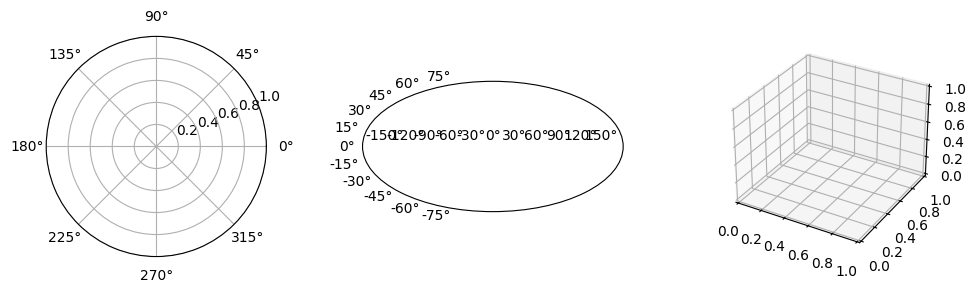

In [19]:
fig = plt.figure(figsize=(10, 3))
ax1 = fig.add_subplot(131, projection="polar")
ax2 = fig.add_subplot(132, projection="aitoff")
ax3 = fig.add_subplot(133, projection="3d")
fig.tight_layout()

## Customizing axes

### Figure aspect

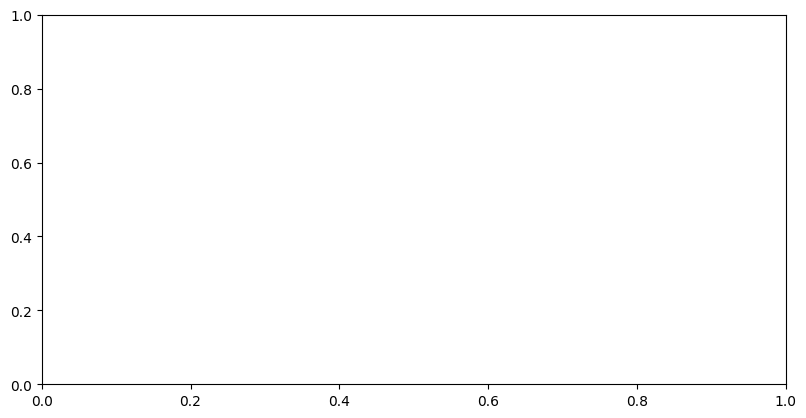

In [20]:
# Changing the figure aspect
fig, ax = plt.subplots(figsize=plt.figaspect(0.5))
plt.show()

### Custom size

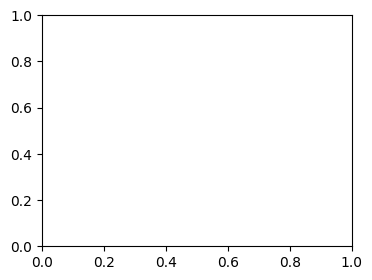

In [21]:
# Custom figure size
fig, ax = plt.subplots(figsize=(4, 3))  # width, height
plt.show()

### Gridlines

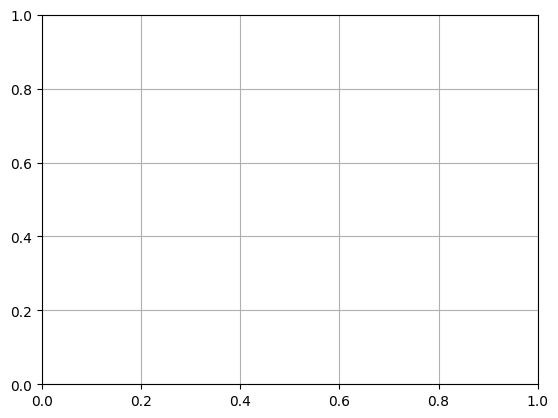

In [22]:
fig, ax = plt.subplots()
ax.grid(True)
plt.show()

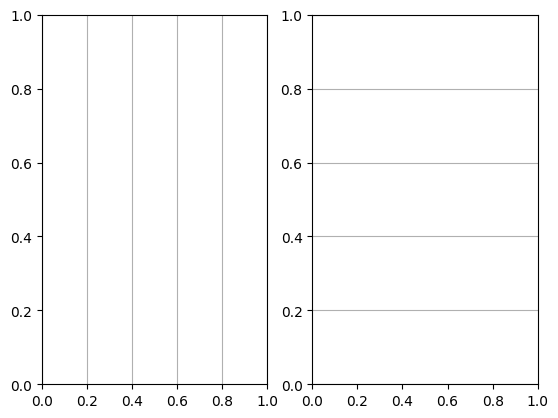

In [23]:
# Adding only vertical or horizontal grid lines
fig, axs = plt.subplots(1, 2)
axs[0].grid(True, axis="x")
axs[1].grid(True, axis="y")
plt.show()

### Spines

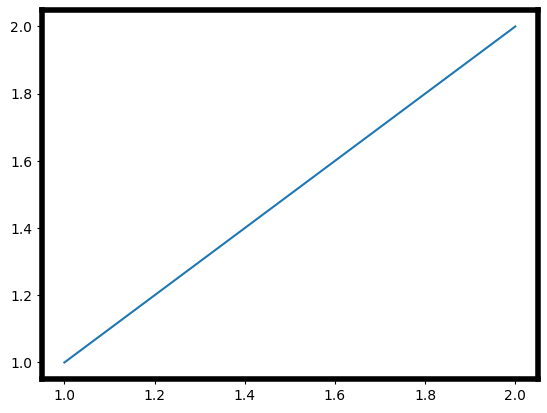

In [24]:
fig, ax = plt.subplots()
ax.plot([1, 2], [1, 2])
for axis in ["top", "bottom", "left", "right"]:
    ax.spines[axis].set_linewidth(4)
plt.show()

### Removing axis

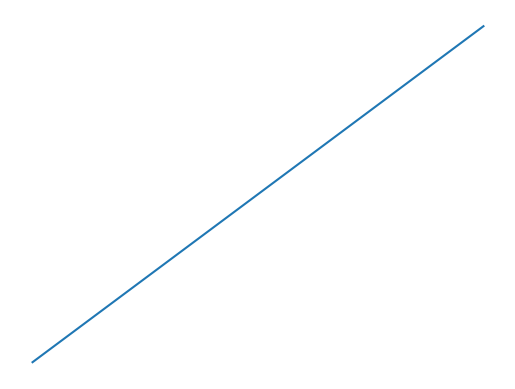

In [25]:
fig, ax = plt.subplots()
ax.plot([1, 2], [1, 2])
ax.set_axis_off()
plt.show()

### Twin axis

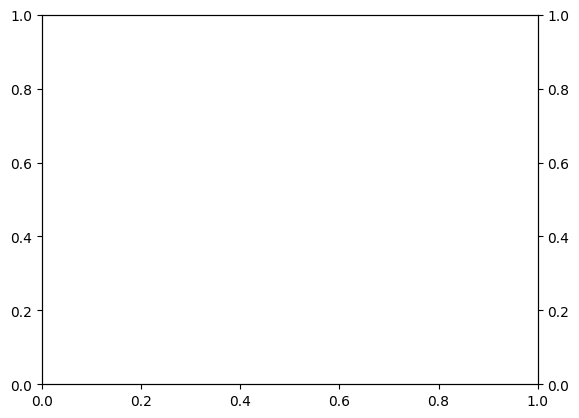

In [26]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
plt.show()

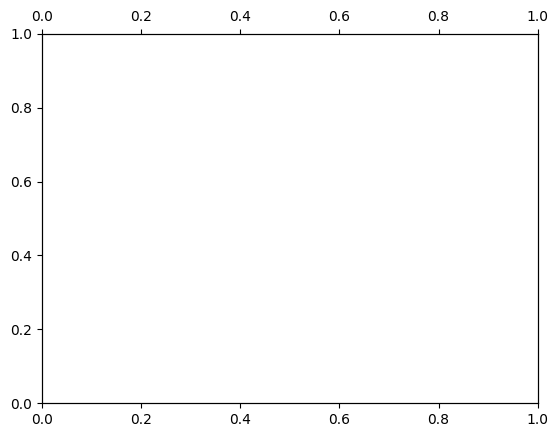

In [27]:
fig, ax1 = plt.subplots()
ax2 = ax1.twiny()
plt.show()

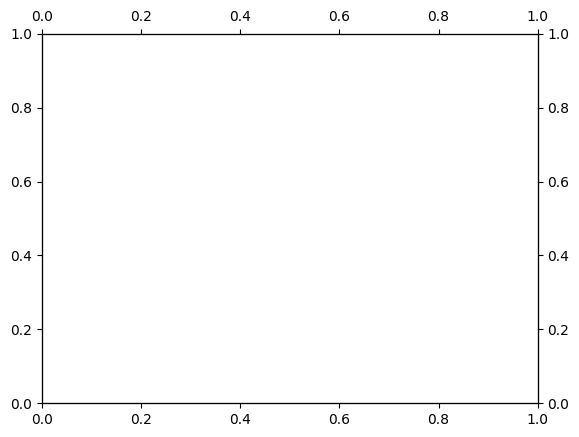

In [28]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx().twiny()
plt.show()

### Inset axis

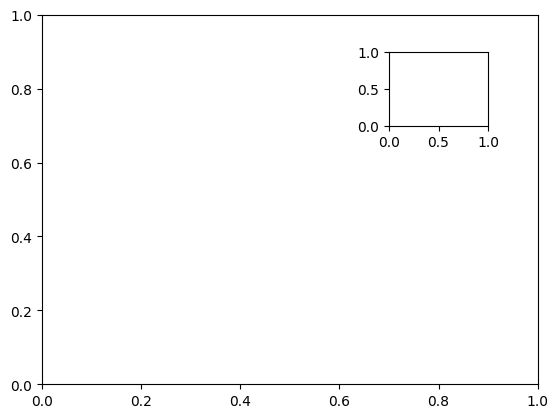

In [29]:
fig, ax = plt.subplots()
ax_ins = ax.inset_axes((0.7, 0.7, 0.2, 0.2))  # x0, y0, width, height
plt.show()

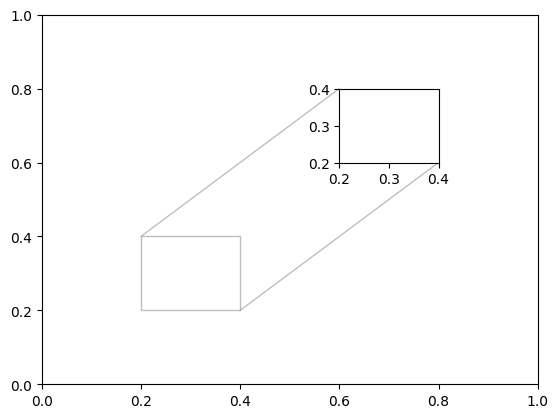

In [30]:
fig, ax = plt.subplots()
ax_ins = ax.inset_axes((0.6, 0.6, 0.2, 0.2))
ax_ins.set_xlim(0.2, 0.4)
ax_ins.set_ylim(0.2, 0.4)
ax.indicate_inset_zoom(ax_ins)
plt.show()

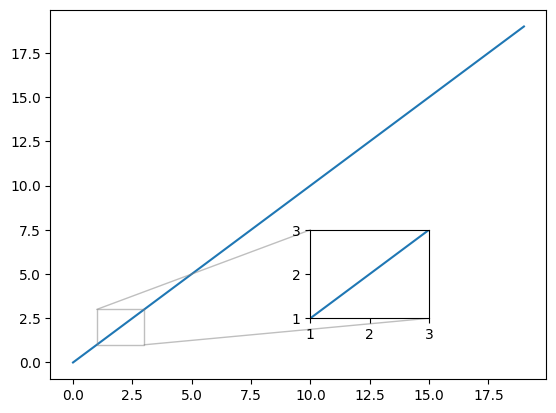

In [31]:
fig, ax = plt.subplots()
ax.plot(range(20))

x_start, x_width = 10, 5
y_start, y_width = 2.5, 5
ax_ins = ax.inset_axes(
    [x_start, y_start, x_width, y_width], transform=ax.transData
)  # x-start, y-start, width, height in data units
ax_ins.plot(range(20))
ax_ins.set_xlim(1, 3)
ax_ins.set_ylim(1, 3)
ax.indicate_inset_zoom(ax_ins)
plt.show()

### Broken axis

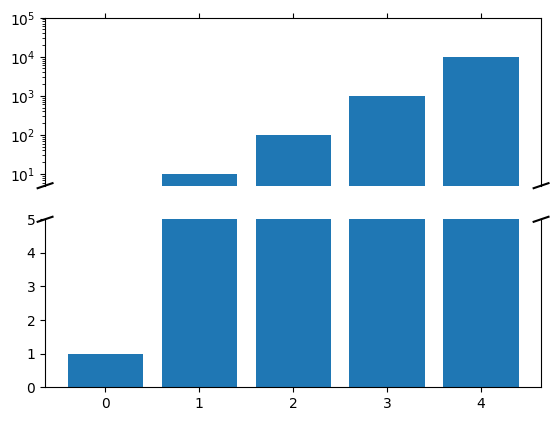

In [32]:
def add_cutout_lines(upper, lower):
    d = 0.015
    kwargs = dict(transform=upper.transAxes, color="k", clip_on=False)
    upper.plot((-d, +d), (-d, +d), **kwargs)  # top-left diagonal
    upper.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

    kwargs.update(transform=lower.transAxes)  # switch to the bottom axes
    lower.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
    lower.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal


def broken_axis():
    fig, (upper, lower) = plt.subplots(nrows=2)
    upper.spines["bottom"].set_visible(False)
    upper.xaxis.tick_top()
    upper.tick_params(labeltop=False)
    lower.spines["top"].set_visible(False)
    add_cutout_lines(upper, lower)
    return fig, (upper, lower)


x = range(5)
y = [10**i for i in x]

fig, (upper, lower) = broken_axis()

lower.bar(x, y)
lower.set_ylim(0, 5)

upper.bar(x, y)
upper.set_ylim(5, 100_000)
upper.set_yscale("log")

plt.show()

## Table layout

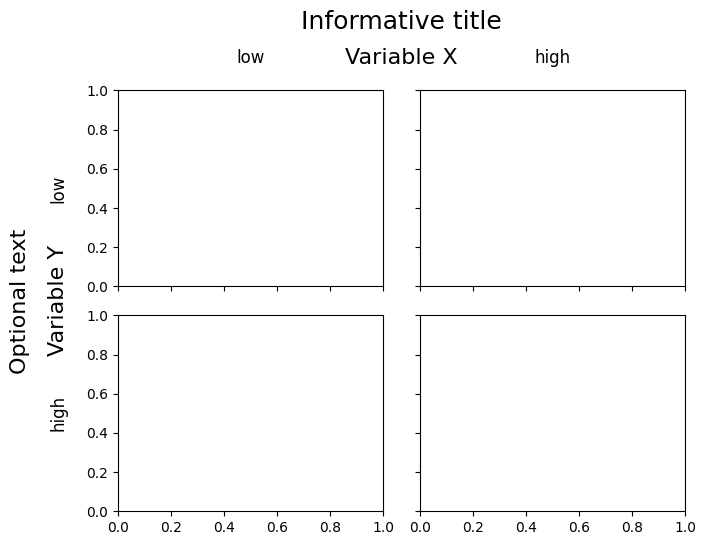

In [33]:
def hcenter_of_axis(ax: plt.Axes) -> float:
    return ax.get_position().x0 + (ax.get_position().xmax - ax.get_position().x0) / 2


def hcenter_of_two_axes(ax1: plt.Axes, ax2: plt.Axes):
    return ax1.get_position().x0 + (ax2.get_position().xmax - ax1.get_position().x0) / 2


def vcenter_of_axis(ax: plt.Axes) -> float:
    return ax.get_position().y0 + (ax.get_position().ymax - ax.get_position().y0) / 2


def vcenter_of_two_axes(ax1: plt.Axes, ax2: plt.Axes):
    return ax1.get_position().y0 + (ax2.get_position().ymax - ax1.get_position().y0) / 2


align = {"ha": "center", "va": "center"}
xl = {"fontsize": 18}
lg = {"fontsize": 16}
md = {"fontsize": 14}
sm = {"fontsize": 12}
rot = {"rotation": 90}

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, sharey=True)
fig.tight_layout()  # This needs to run before adding the text

fig.text(hcenter_of_two_axes(ax1, ax2), 1.1, "Informative title", **align | xl)
fig.text(hcenter_of_two_axes(ax1, ax2), 1.025, "Variable X", **align | lg)
fig.text(hcenter_of_axis(ax1), 1.025, "low", **align | sm)
fig.text(hcenter_of_axis(ax2), 1.025, "high", **align | sm)

fig.text(-0.08, vcenter_of_two_axes(ax1, ax3), "Optional text", **align | lg | rot)
fig.text(-0.02, vcenter_of_two_axes(ax1, ax3), "Variable Y", **align | lg | rot)
fig.text(-0.02, vcenter_of_axis(ax1), "low", **align | sm | rot)
fig.text(-0.02, vcenter_of_axis(ax3), "high", **align | sm | rot)

plt.show()